In [88]:
import pandas as pd
import json
import matplotlib.pyplot as plt
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler

In [89]:
with open('/opt/ml/final/output/vflat_image_3.json') as f:
    json_data = json.load(f)

In [90]:
word_list = json_data['ocr']['word']

In [91]:
text_list = []
x_list = []
y_list = []

for word in word_list:
    sum_x,sum_y = 0.0,0.0
    for idx, point in enumerate(word['points']):
        sum_x += point[0]
        sum_y += point[1]
    avg_x = sum_x/4
    avg_y = sum_y/4
    text_list.append(word['text'])
    x_list.append(avg_x)
    y_list.append(avg_y)

In [92]:
bc_df = pd.DataFrame({'text':text_list,'x':x_list,'y':y_list})
bc_df

,text,x,y
0,자투자,2314.00,736.00
1,CHATOCHA,2305.50,942.50
2,평동,3257.00,1409.00
3,수원시,2099.00,1410.50
4,권선구,2433.00,1410.50
5,세화로,2761.50,1410.50
6,본사,1460.50,1413.25
7,금융부문이사,592.50,1415.50
8,경기도,1770.50,1414.50
9,44,3005.00,1410.00


In [93]:
# 두 가지 feature를 대상
data = bc_df[['x', 'y']]

# 정규화 진행
scaler = StandardScaler()
data_scale = scaler.fit_transform(data)

<h3>적절한 eps값을 찾아야함

In [96]:
# epsilon, 최소 샘플 개수 설정
eps = 0.85 # 수정해야하는 값
min_samples = 2
model = DBSCAN(eps=eps, min_samples=min_samples)

# 군집화 모델 학습 및 클러스터 예측 결과 반환
model.fit(data_scale)
bc_df['cluster'] = model.fit_predict(data_scale)

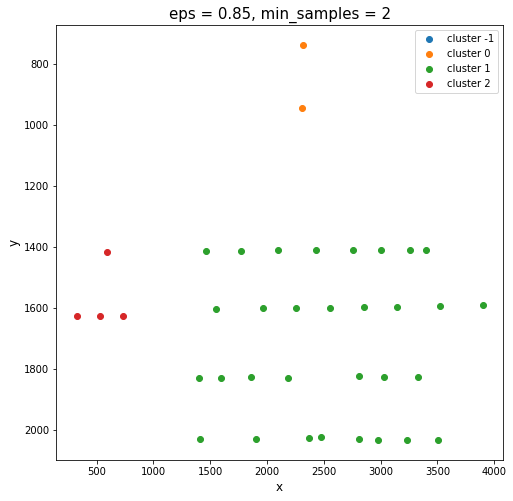

In [95]:
plt.figure(figsize = (8, 8))

# 이상치 번호는 -1, 클러스터 최대 숫자까지 iteration
for i in range(-1, bc_df['cluster'].max() + 1):
    plt.scatter(bc_df.loc[bc_df['cluster'] == i, 'x'], bc_df.loc[bc_df['cluster'] == i, 'y'], 
                label = 'cluster ' + str(i))

plt.legend()
plt.title(f'eps = {eps}, min_samples = {min_samples}', size = 15)
plt.xlabel('x', size = 12)
plt.ylabel('y', size = 12)
plt.gca().invert_yaxis()
plt.show()